In [1]:
import numpy as np
from scipy import special as sp
from scipy.optimize import minimize
import matplotlib.pyplot as plt

plt.rcParams["figure.dpi"] = 600

In [2]:
def S_theor(x):
    return 1 - x / 100


def S_emp(x, X):
    return (X > x).mean()

def S_smooth(x, X, an, kernel):
    return kernel((x - X) / an).mean()

S_smooth = np.vectorize(S_smooth, excluded=[1, 2, 3])
S_emp = np.vectorize(S_emp, excluded=[1])

def laplas_V(u):
    return np.where(
        u < 0, 
        1 - 0.5 * np.exp(u), 
        0.5 * np.exp(-u)
    )

def gauss_V(u):
    return 0.5 * (1 - sp.erf(u / np.sqrt(2)))


def G1(x, X):
    return np.sum(
        (S_theor(x) - S_emp(x, X)) ** 2
    ) / 100

def G2(an, x, X, kernel):
    return np.sum(
        (S_theor(x) - S_smooth(x, X, an, kernel)) ** 2
    ) / 100

In [3]:
X = np.random.uniform(0, 100, 50)


In [4]:
def an_optimal(x, X, kernel):
    return minimize(G2, [1], args=(x, X, kernel), method="BFGS")

In [5]:
def plots(n=None, X=None):
    if X is None:
        X = np.random.uniform(0, 100, n)
    else:
        n = len(X)

    x = np.linspace(0, 100, 400)

    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    an_laplas = an_optimal(x, X, laplas_V).x[0]
    an_gauss = an_optimal(x, X, gauss_V).x[0]

    ax[0].plot(x, S_emp(x, X), label=r'$S_n(x)$' )
    ax[0].plot(x, S_theor(x), label=r'$S(x)$', linestyle='--')

    ax[1].plot(x, S_smooth(x, X, an_laplas, laplas_V), label=rf"$\tilde{{S}}_n^{{(L)}}(x, a_n^*), a_n^*={an_laplas:.3f}$")
    ax[1].plot(
        x, S_smooth(x, X, an_gauss, gauss_V), label=rf"$\tilde{{S}}_n^{{(G)}}(x, a_n^*), a_n^*={an_gauss:.3f}$"
    )
    ax[1].plot(x, S_theor(x), label=r"$S(x)$", linestyle="--")

    ax[0].legend()
    ax[0].grid(True)
    ax[1].legend()
    ax[1].grid(True)

    fig.suptitle(f"n={n}")
    fig.tight_layout()

    return G1(x, X), G2(an_laplas, x, X, laplas_V), G2(an_gauss, x, X, gauss_V)

In [6]:
import pandas as pd

10        30        50        100       300       500
0  0.017592  0.010107  0.004672  0.031488  0.001107  0.004486
1  0.009186  0.003134  0.003179  0.024485  0.000736  0.004143
2  0.008820  0.002763  0.003132  0.024509  0.000703  0.004171

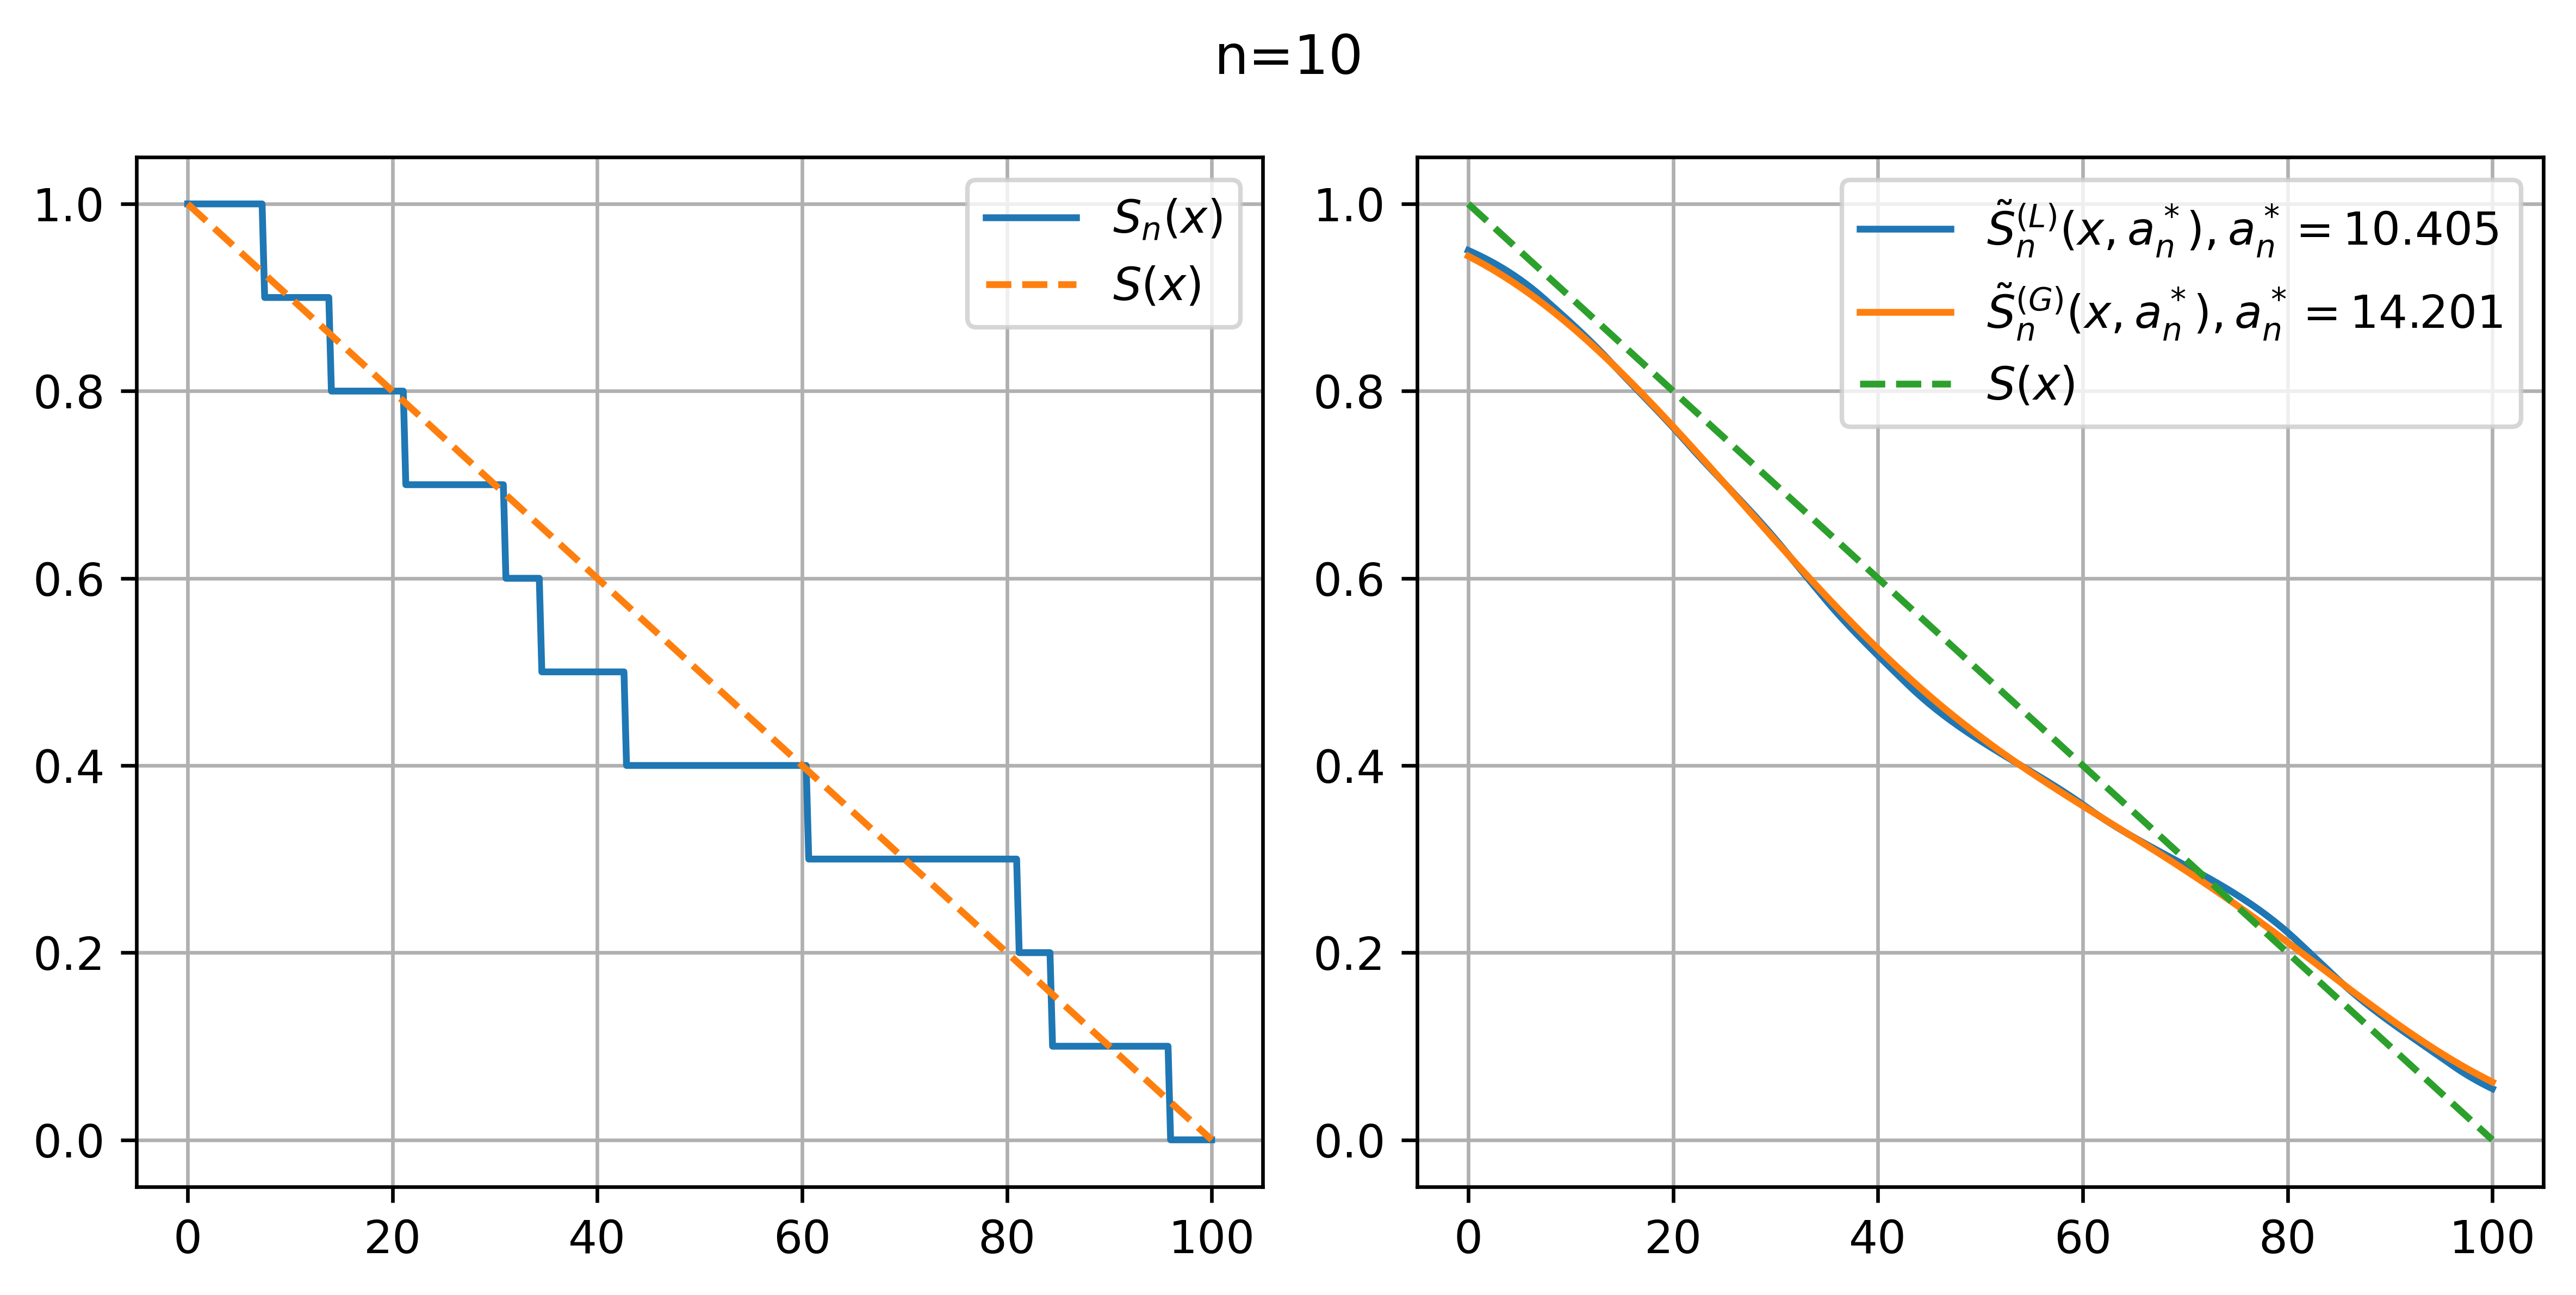

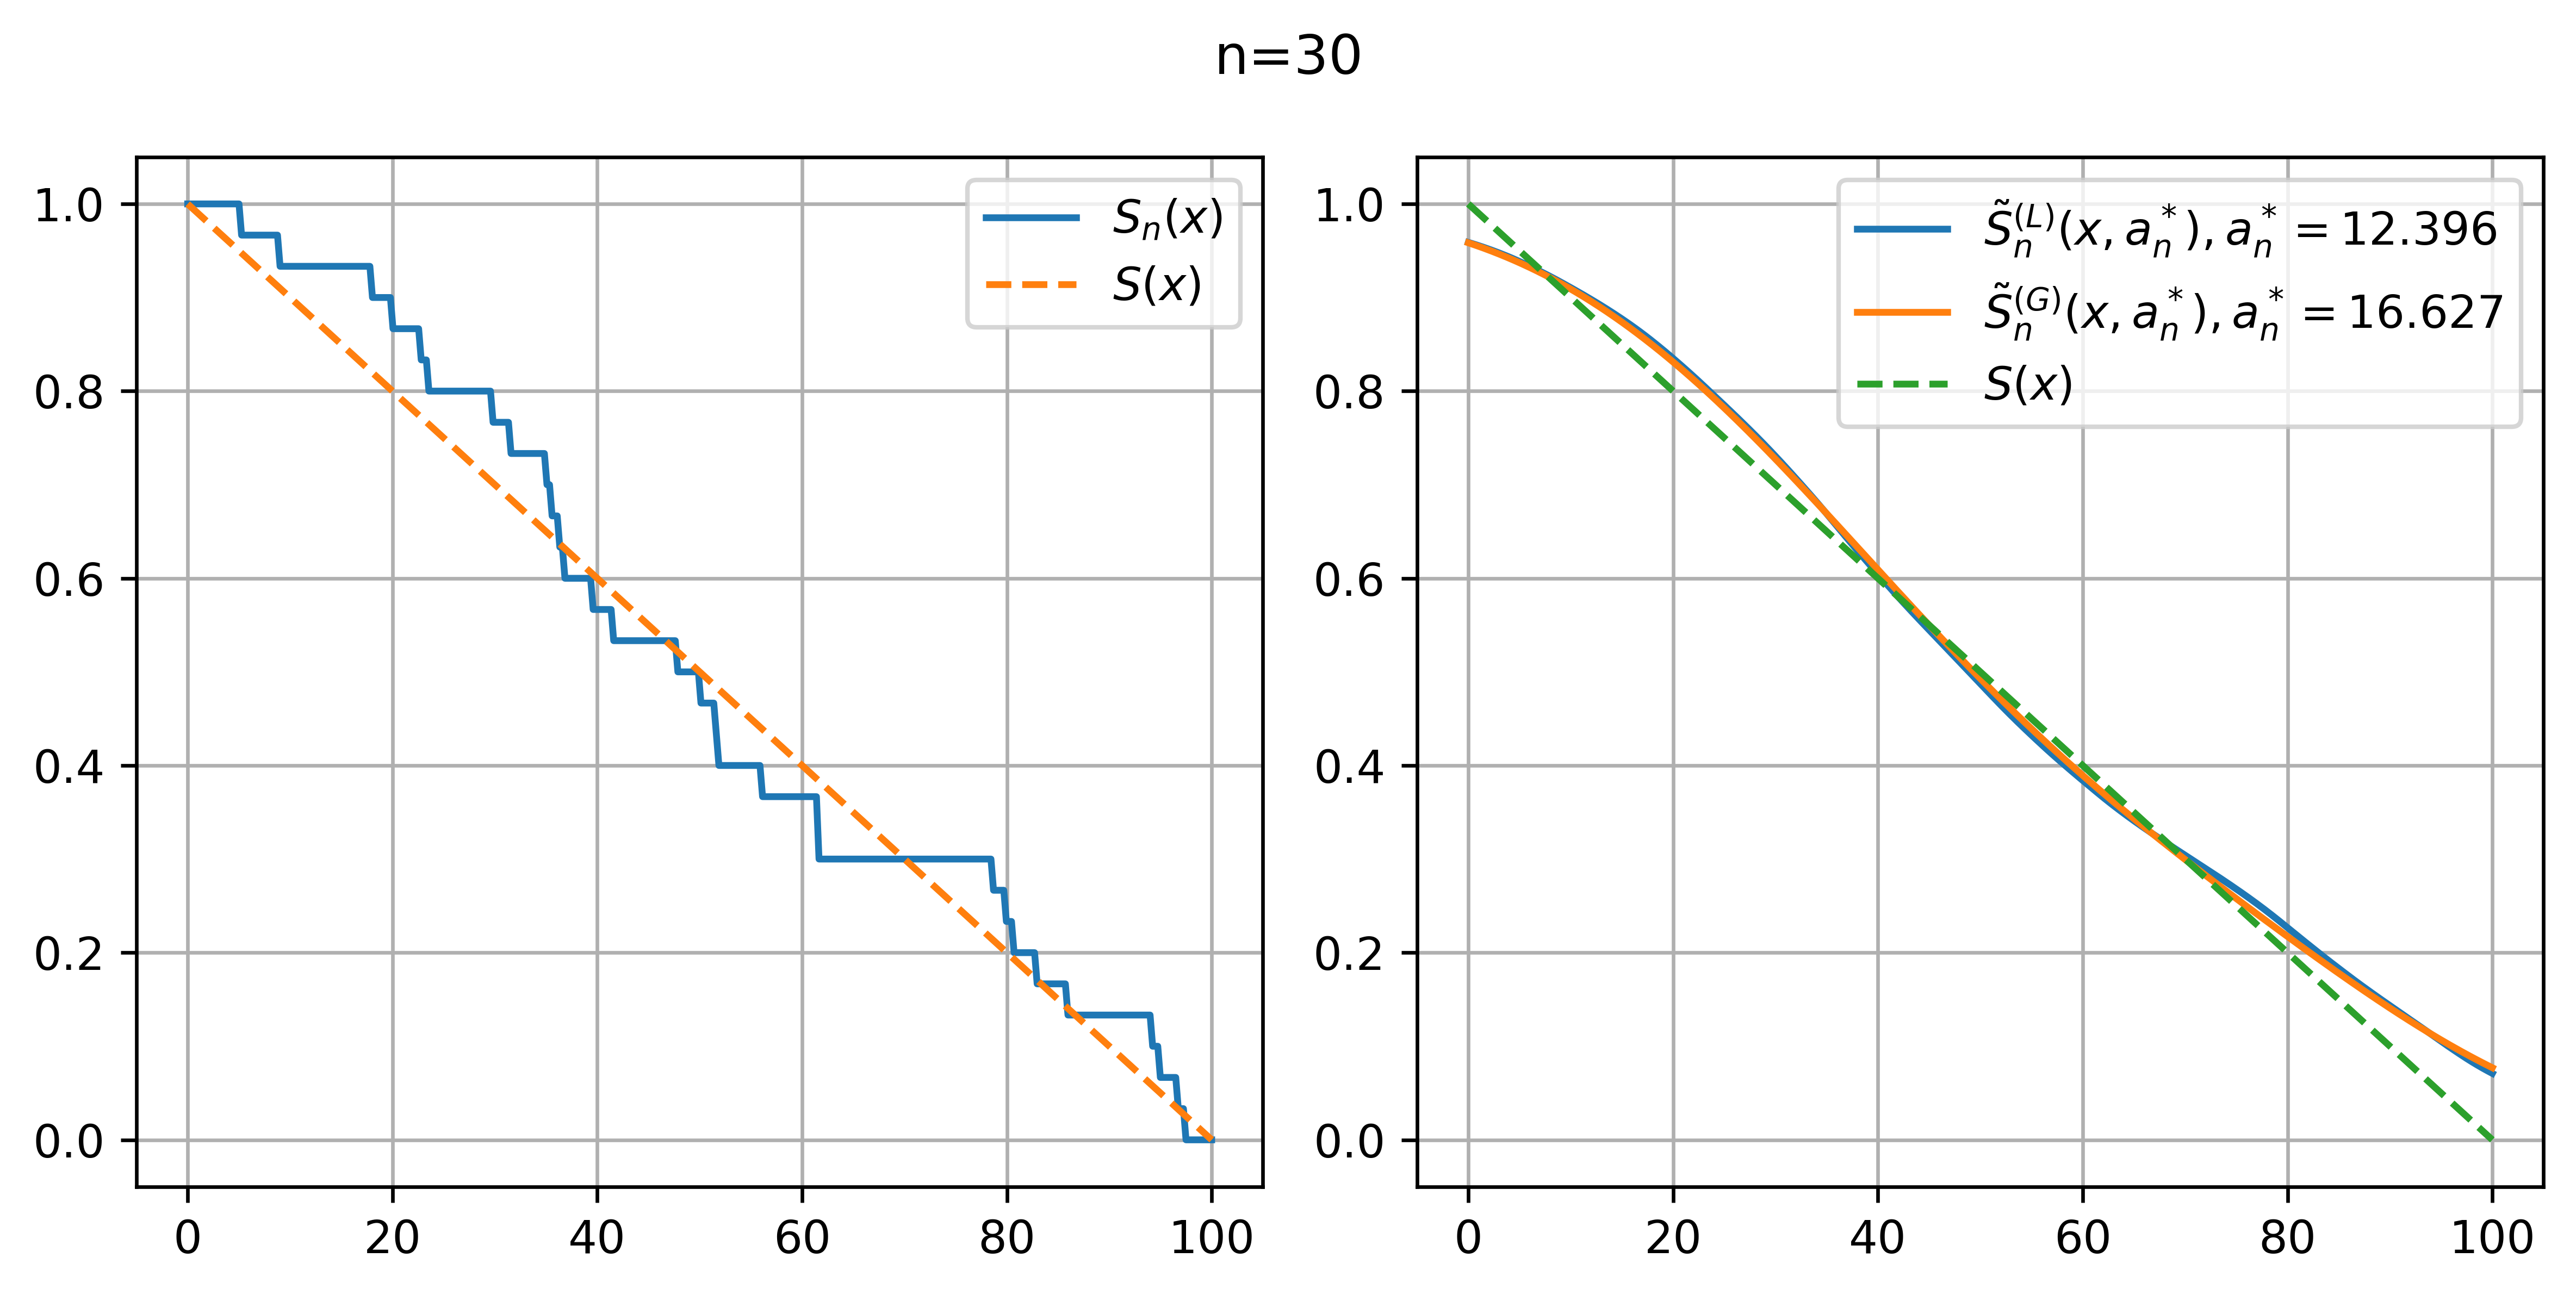

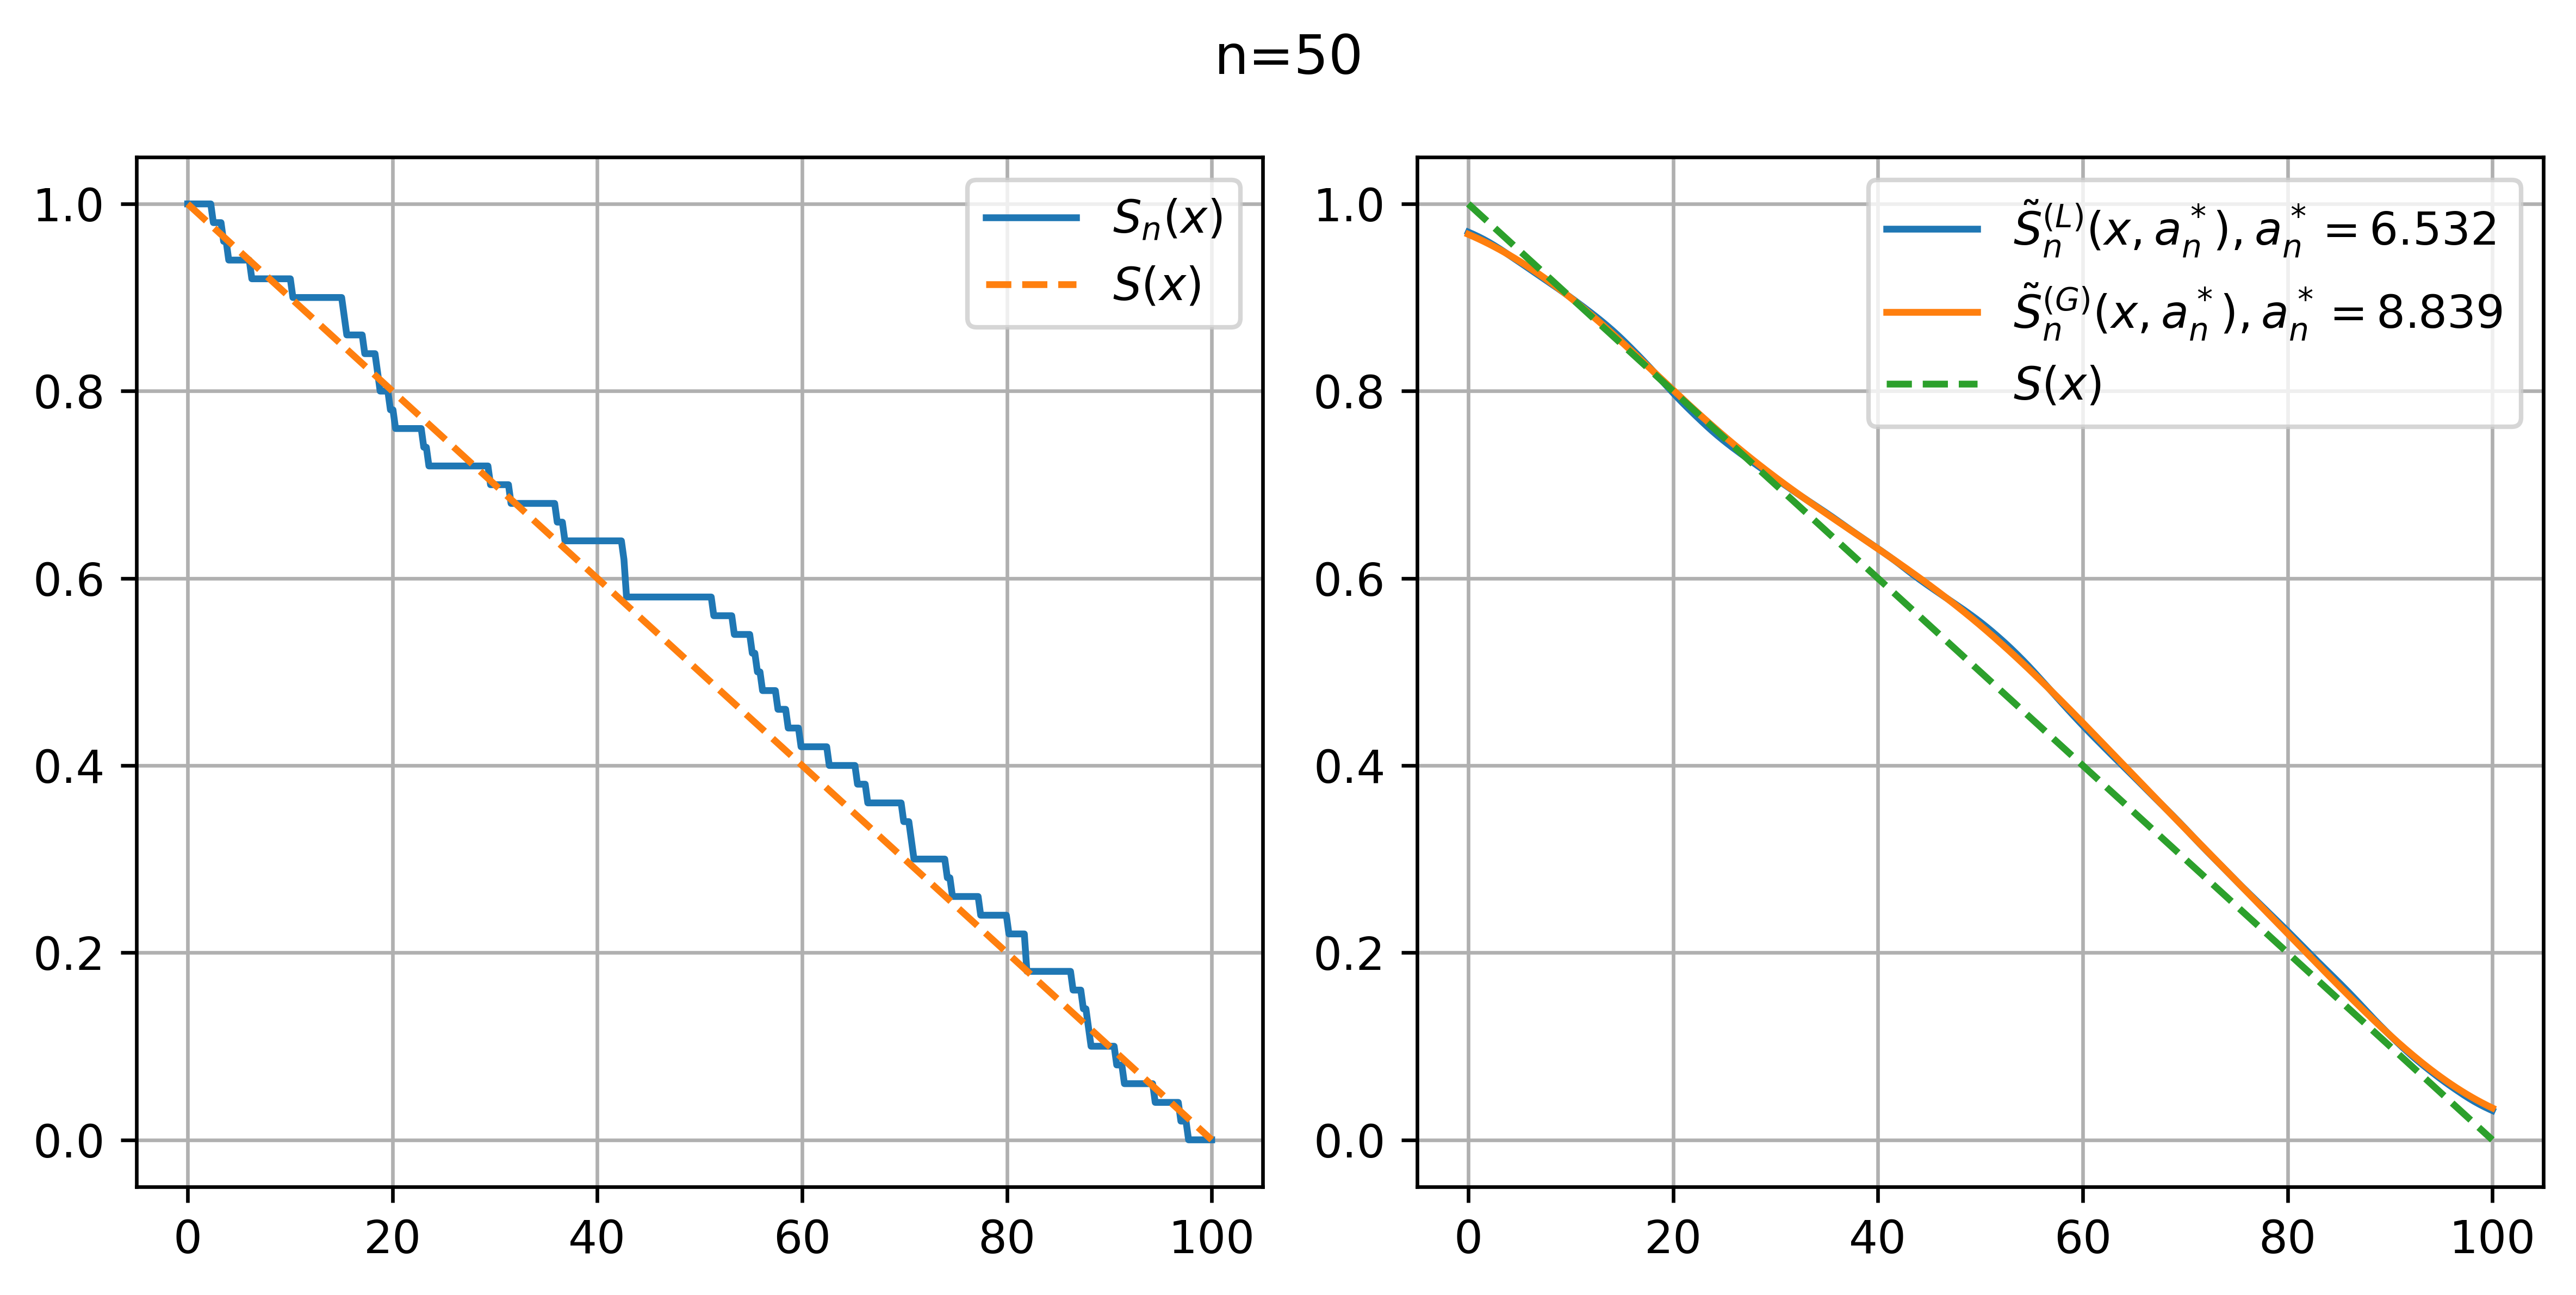

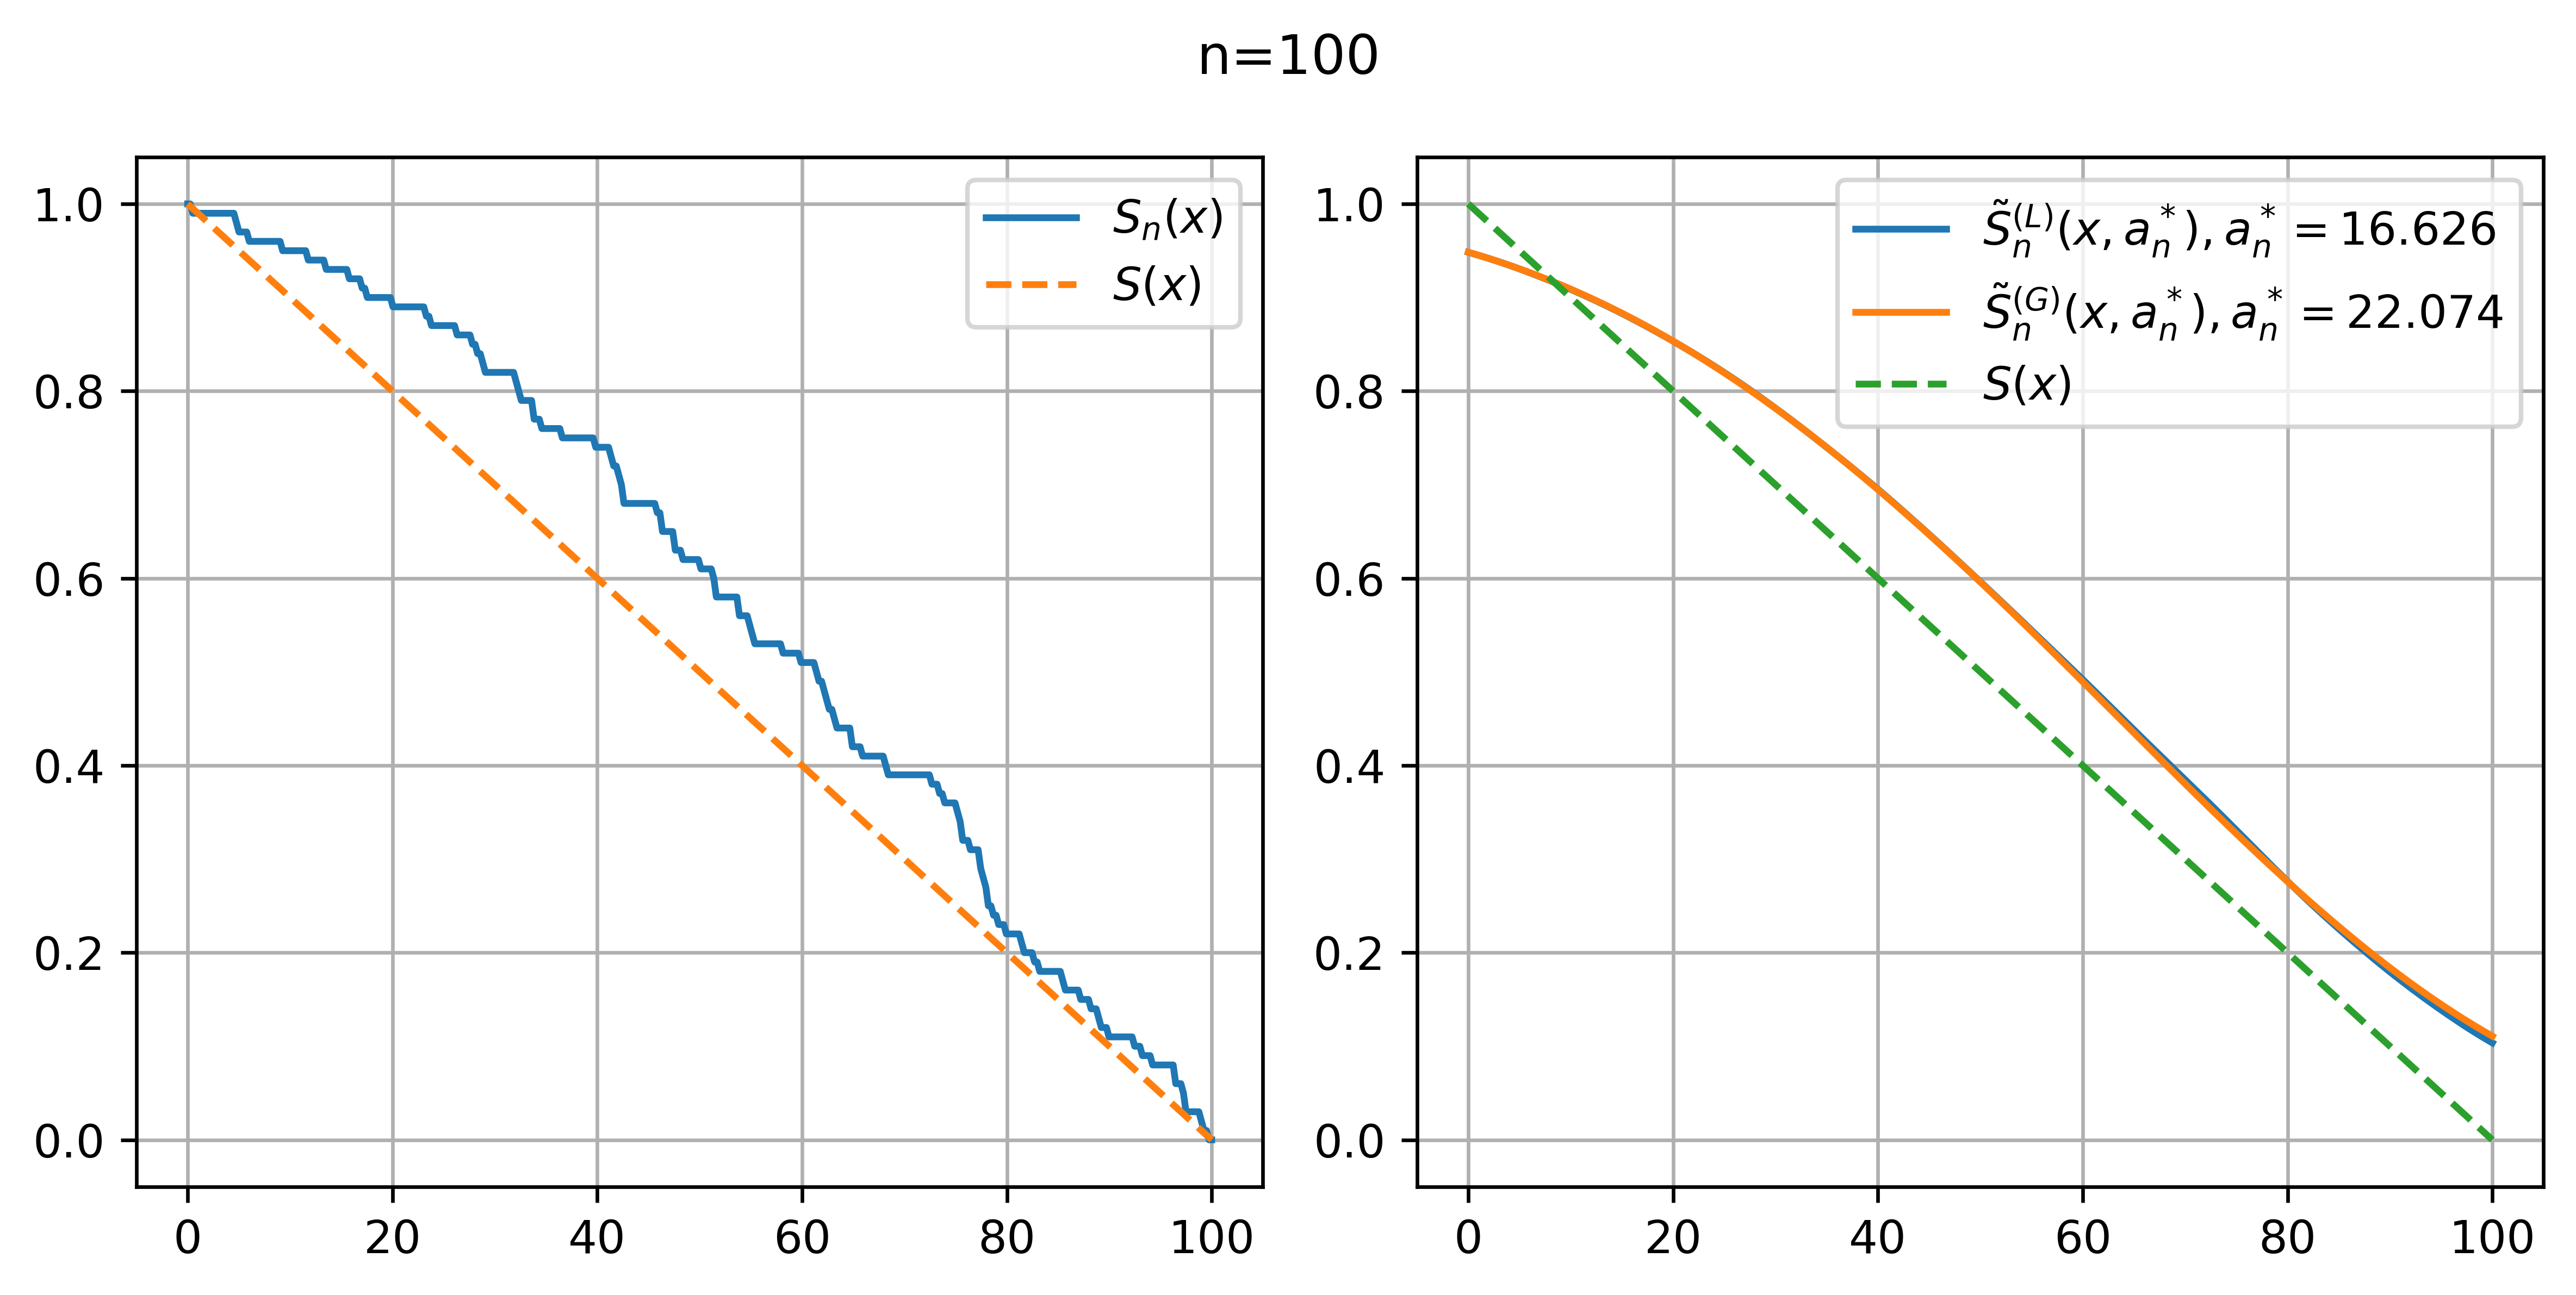

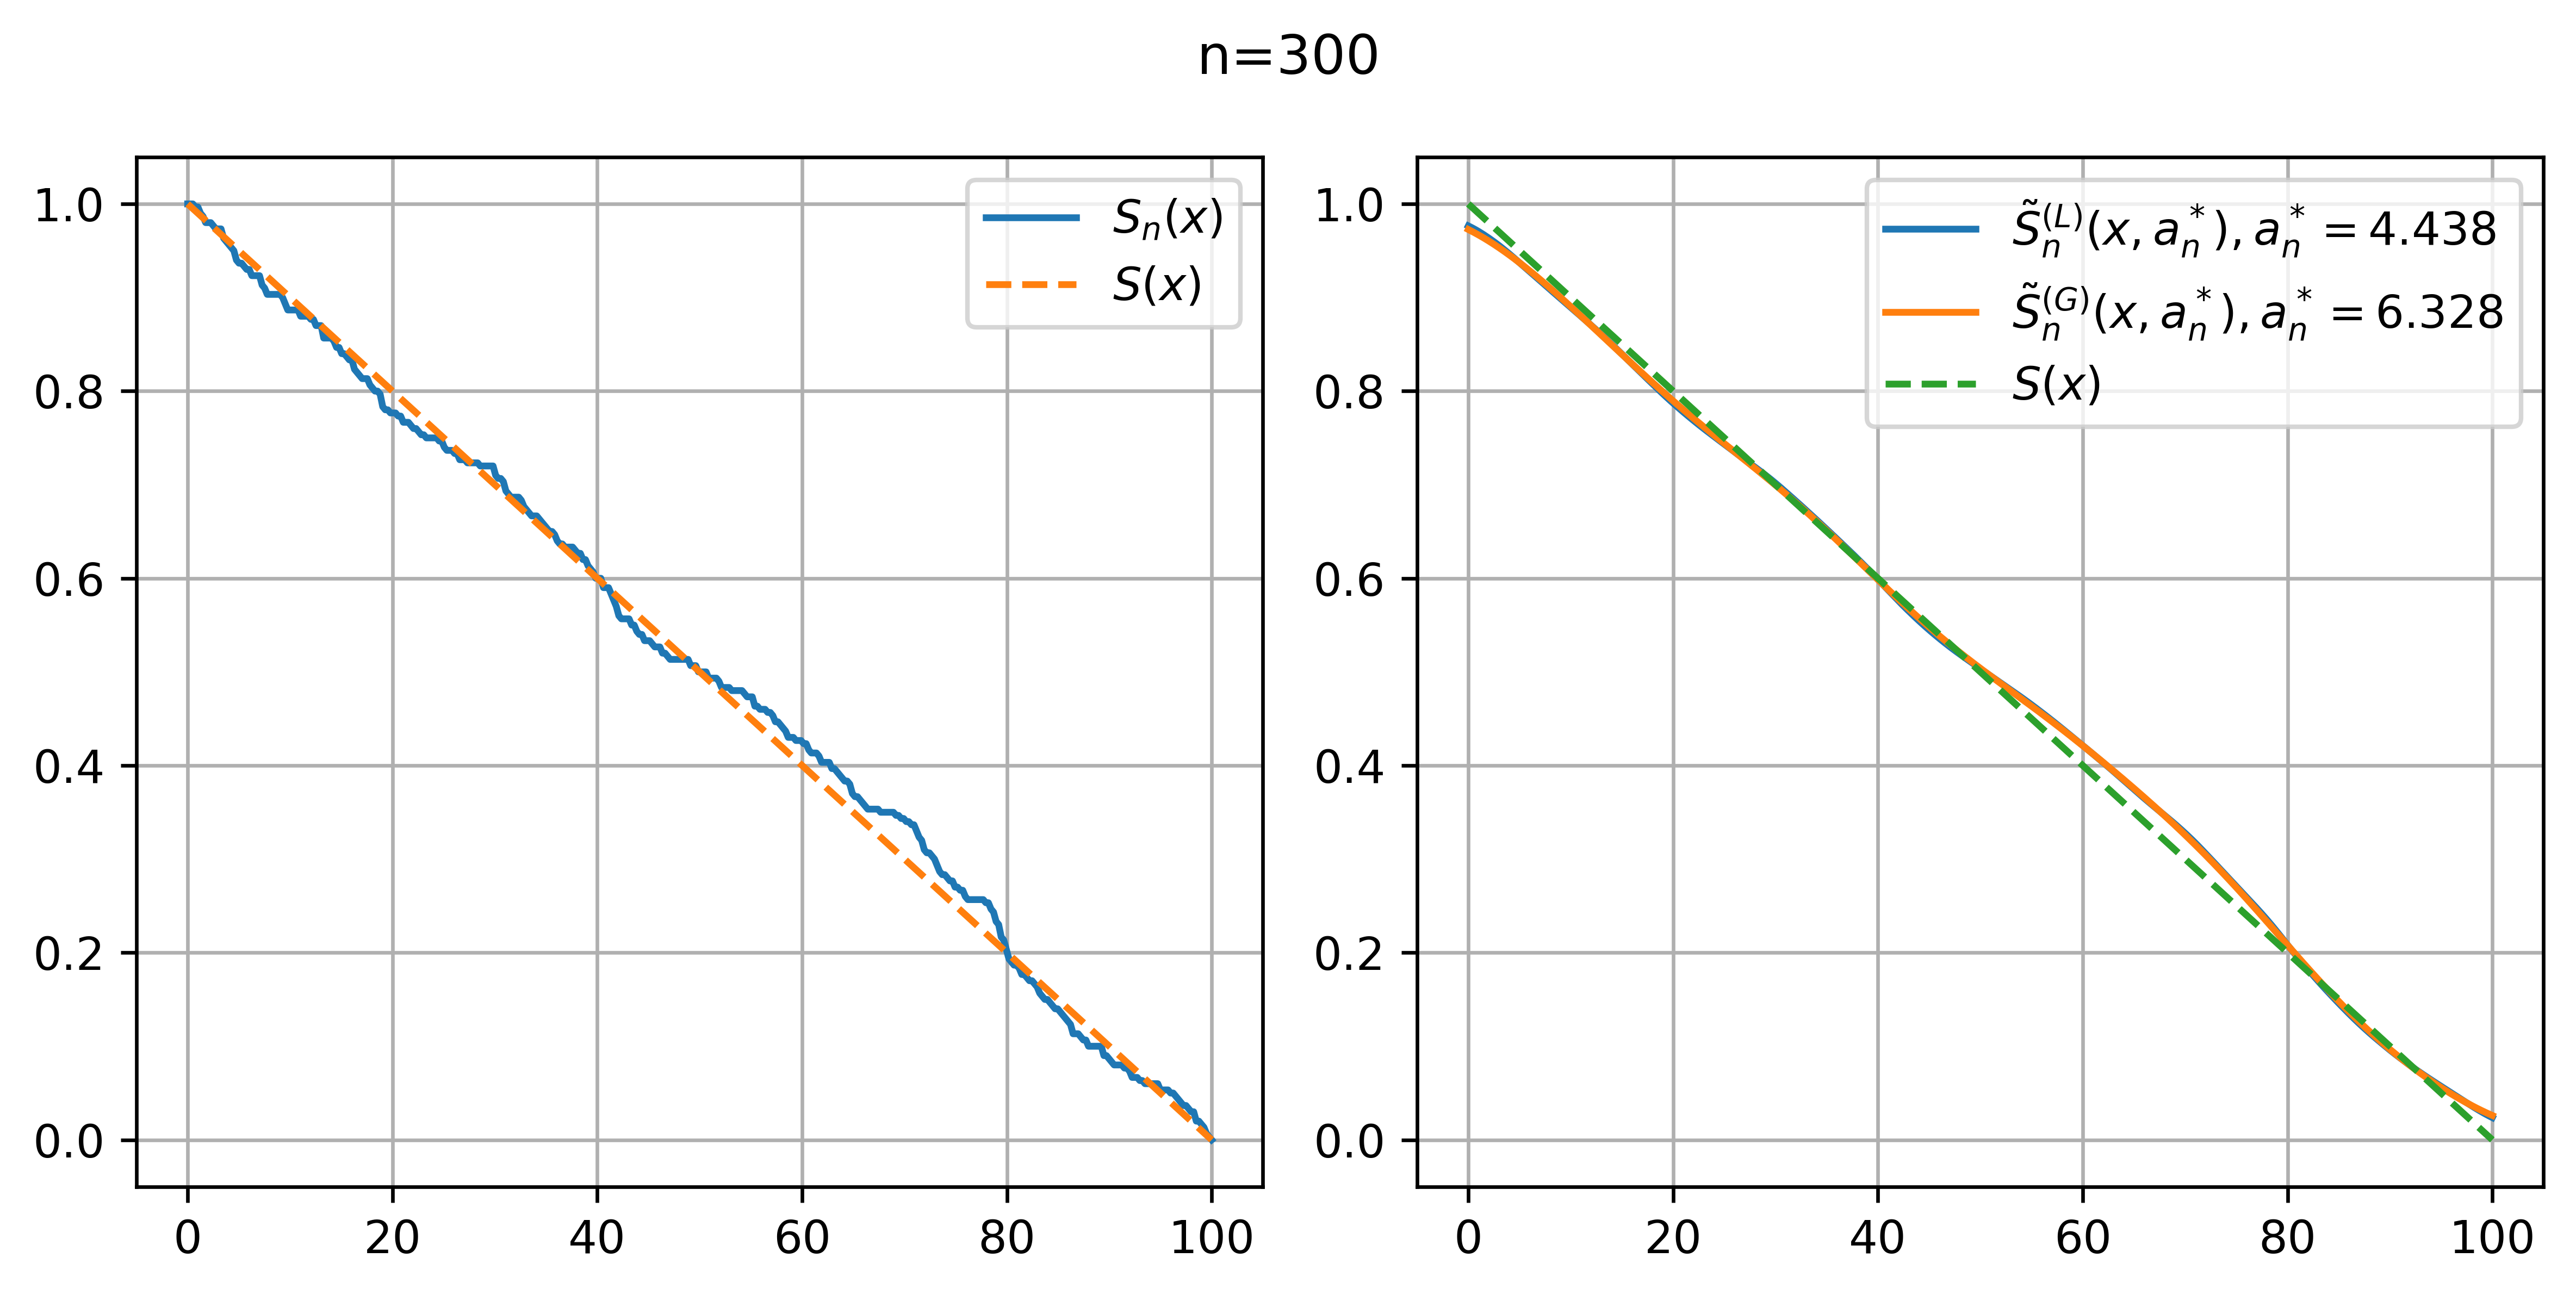

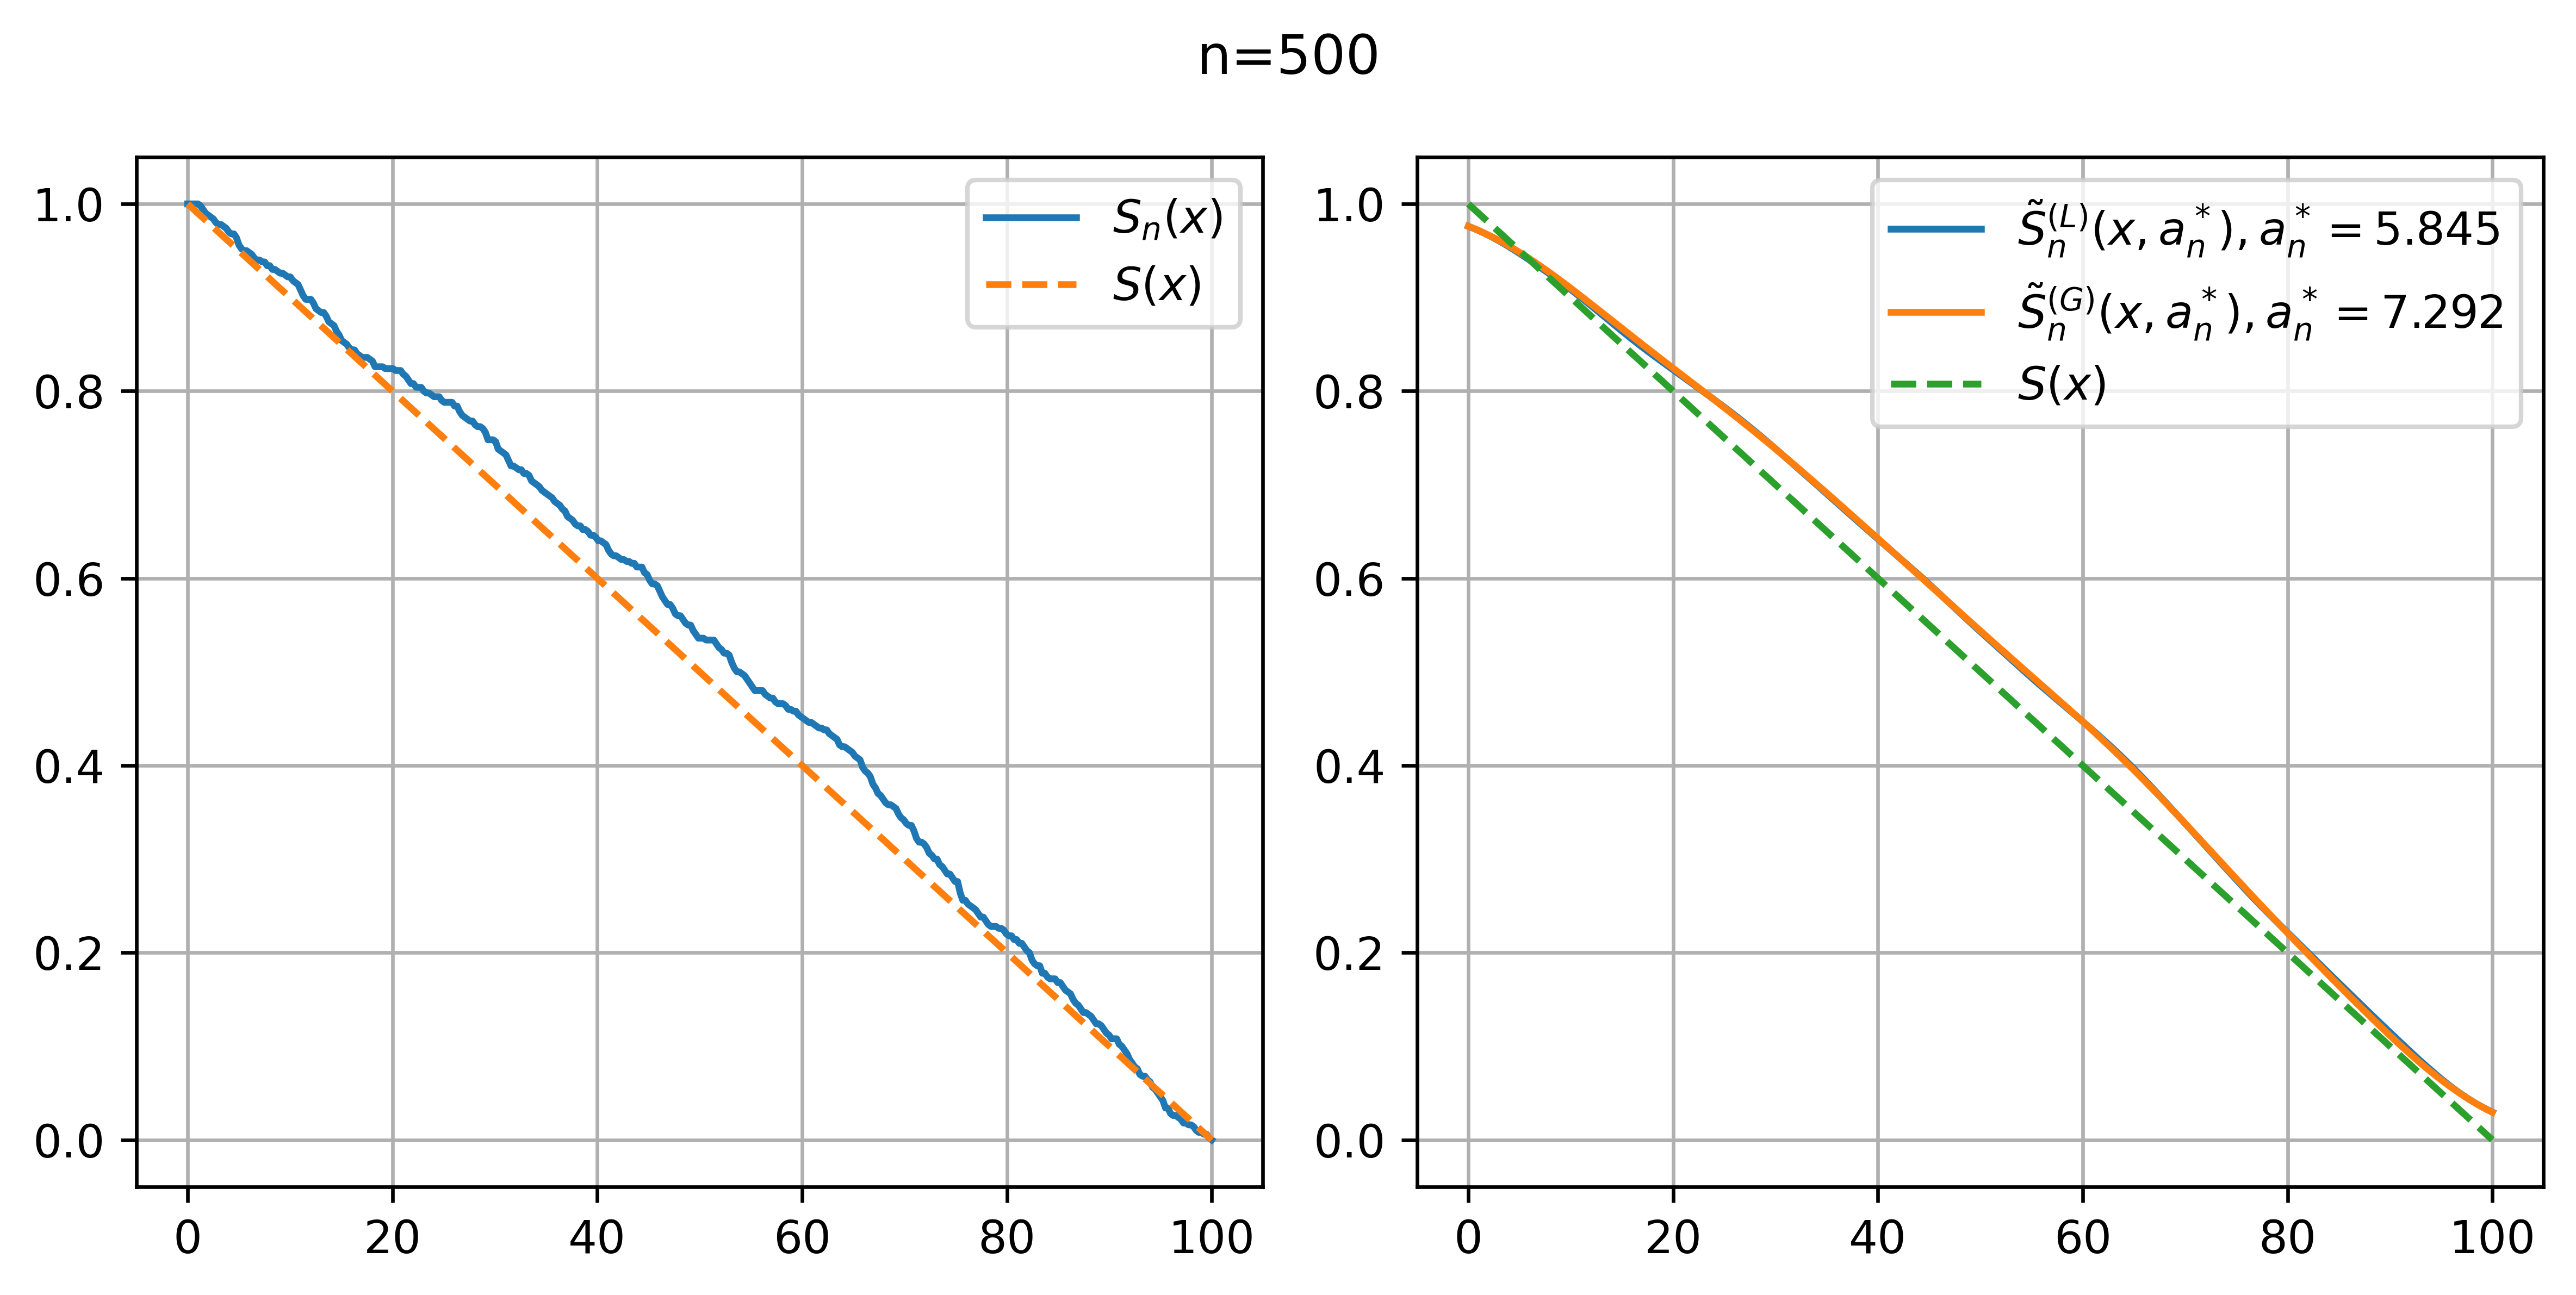

In [7]:
res = {}
for n in [10, 30, 50, 100, 300, 500]:
    criteria = plots(n)

    res[n] = criteria

pd.DataFrame(res)

In [8]:
data = pd.read_csv('data.csv', delimiter=';', decimal=',')

10        50        100       250
0  0.045903  0.012377  0.001951  0.001297
1  0.031880  0.004011  0.001032  0.000797
2  0.030531  0.003689  0.000968  0.000761

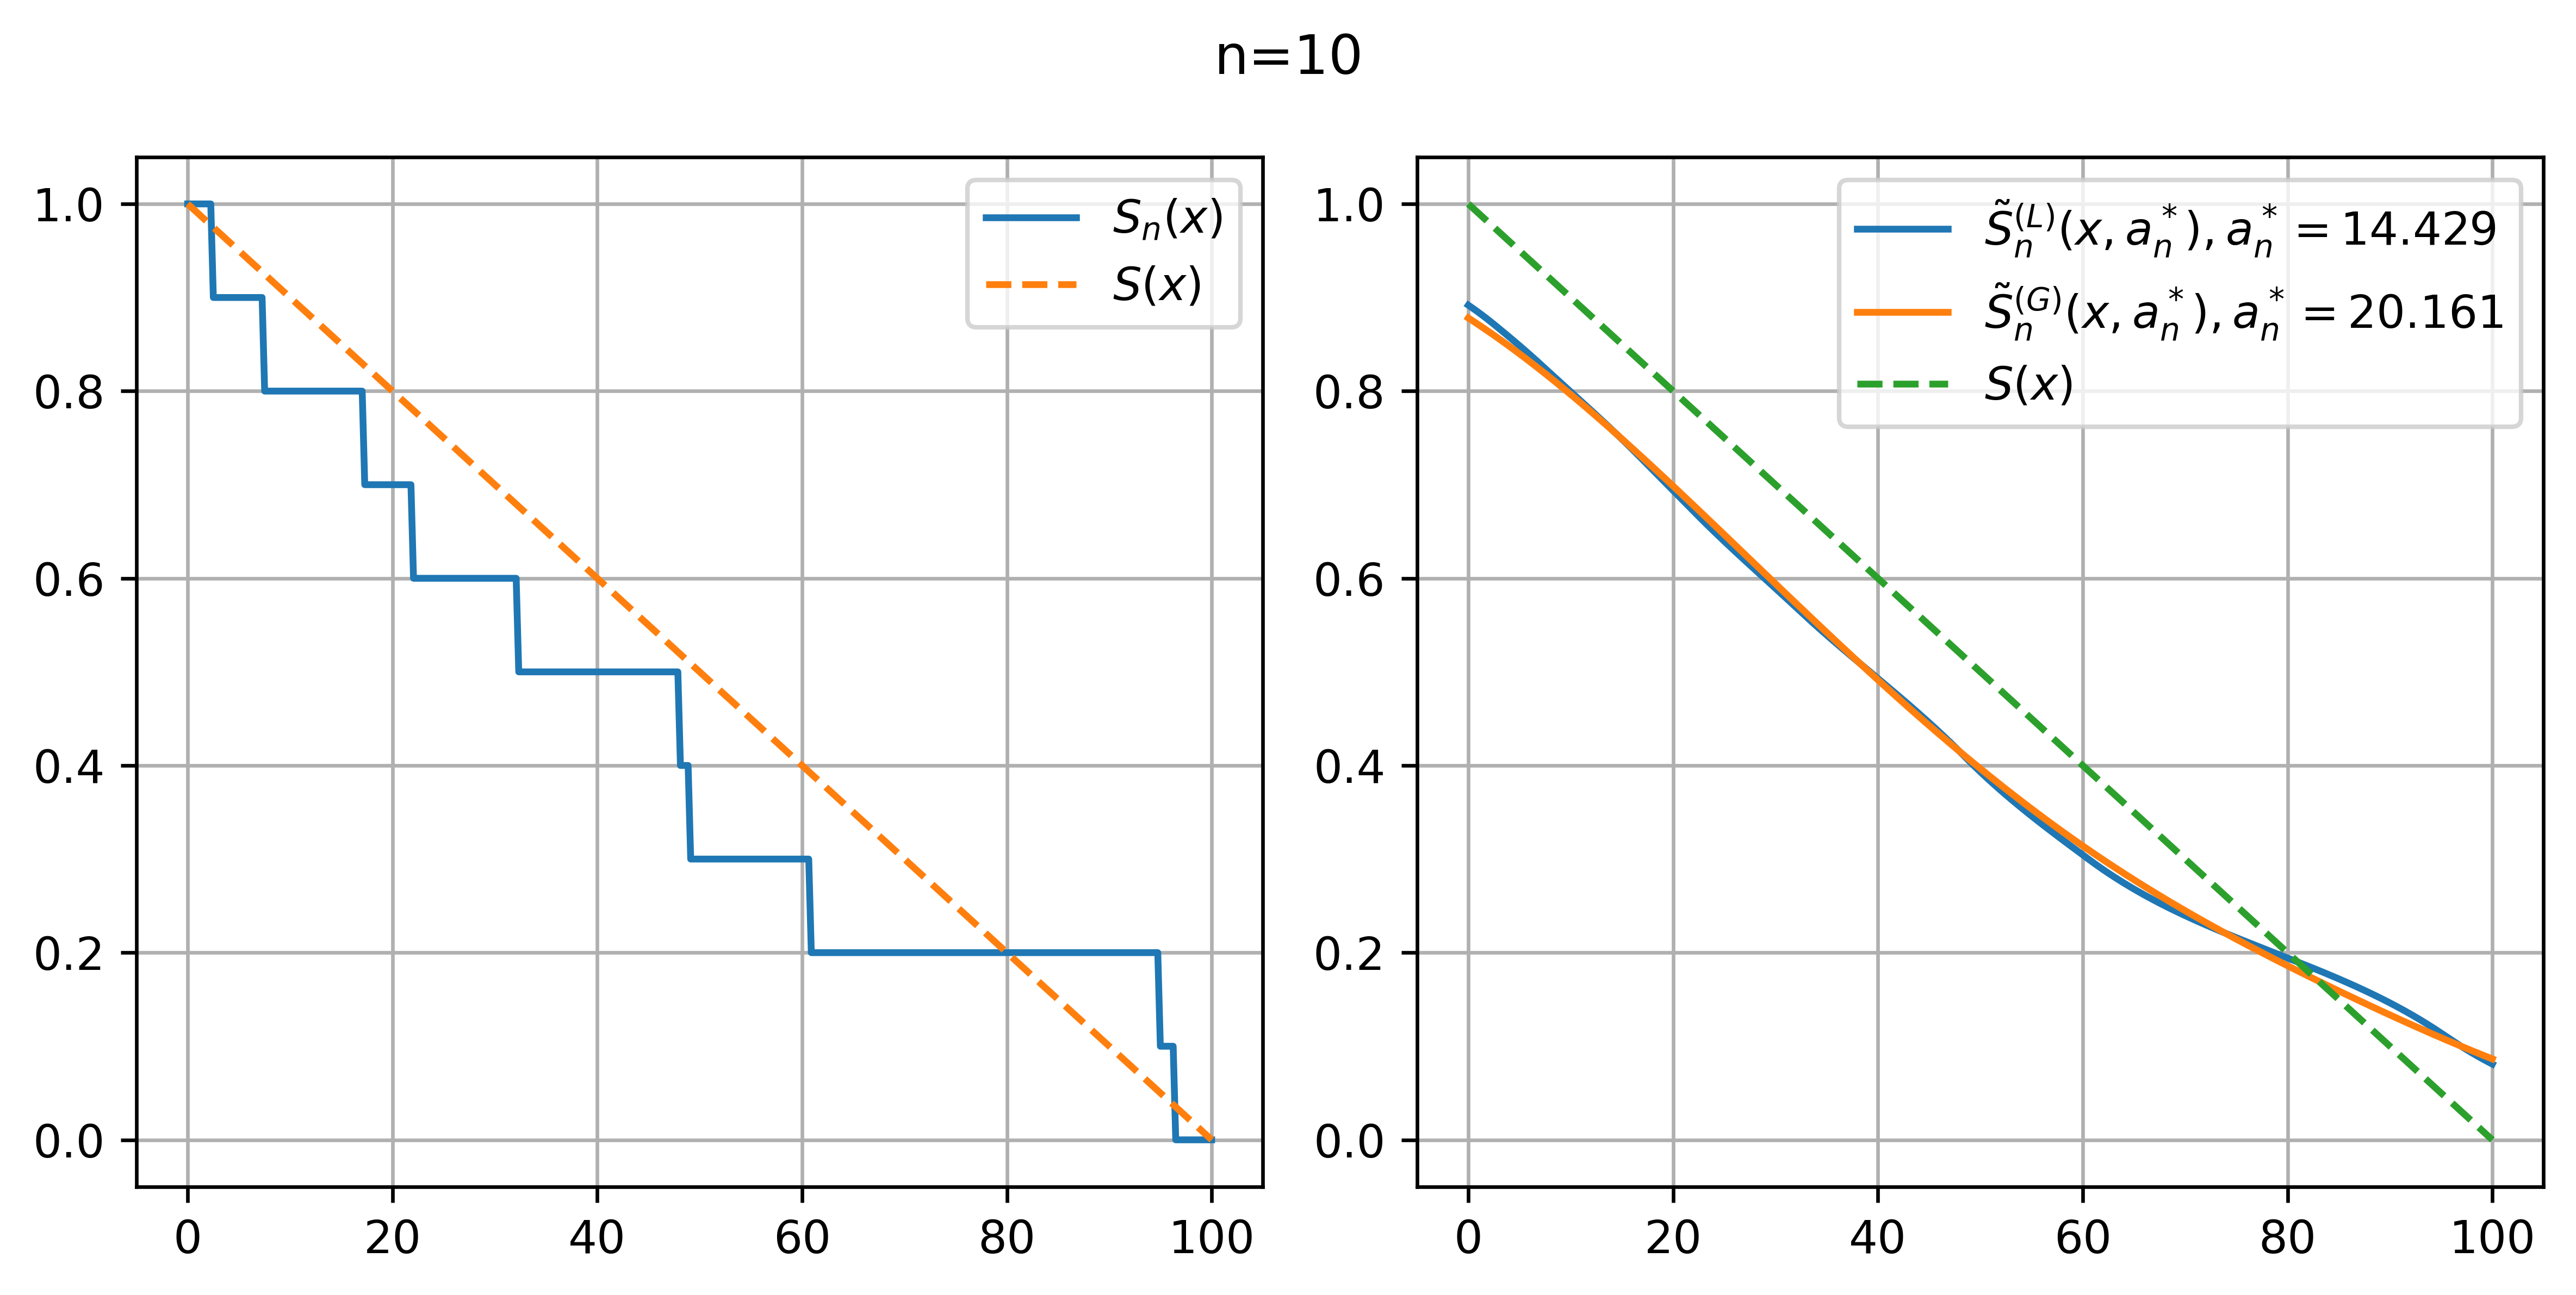

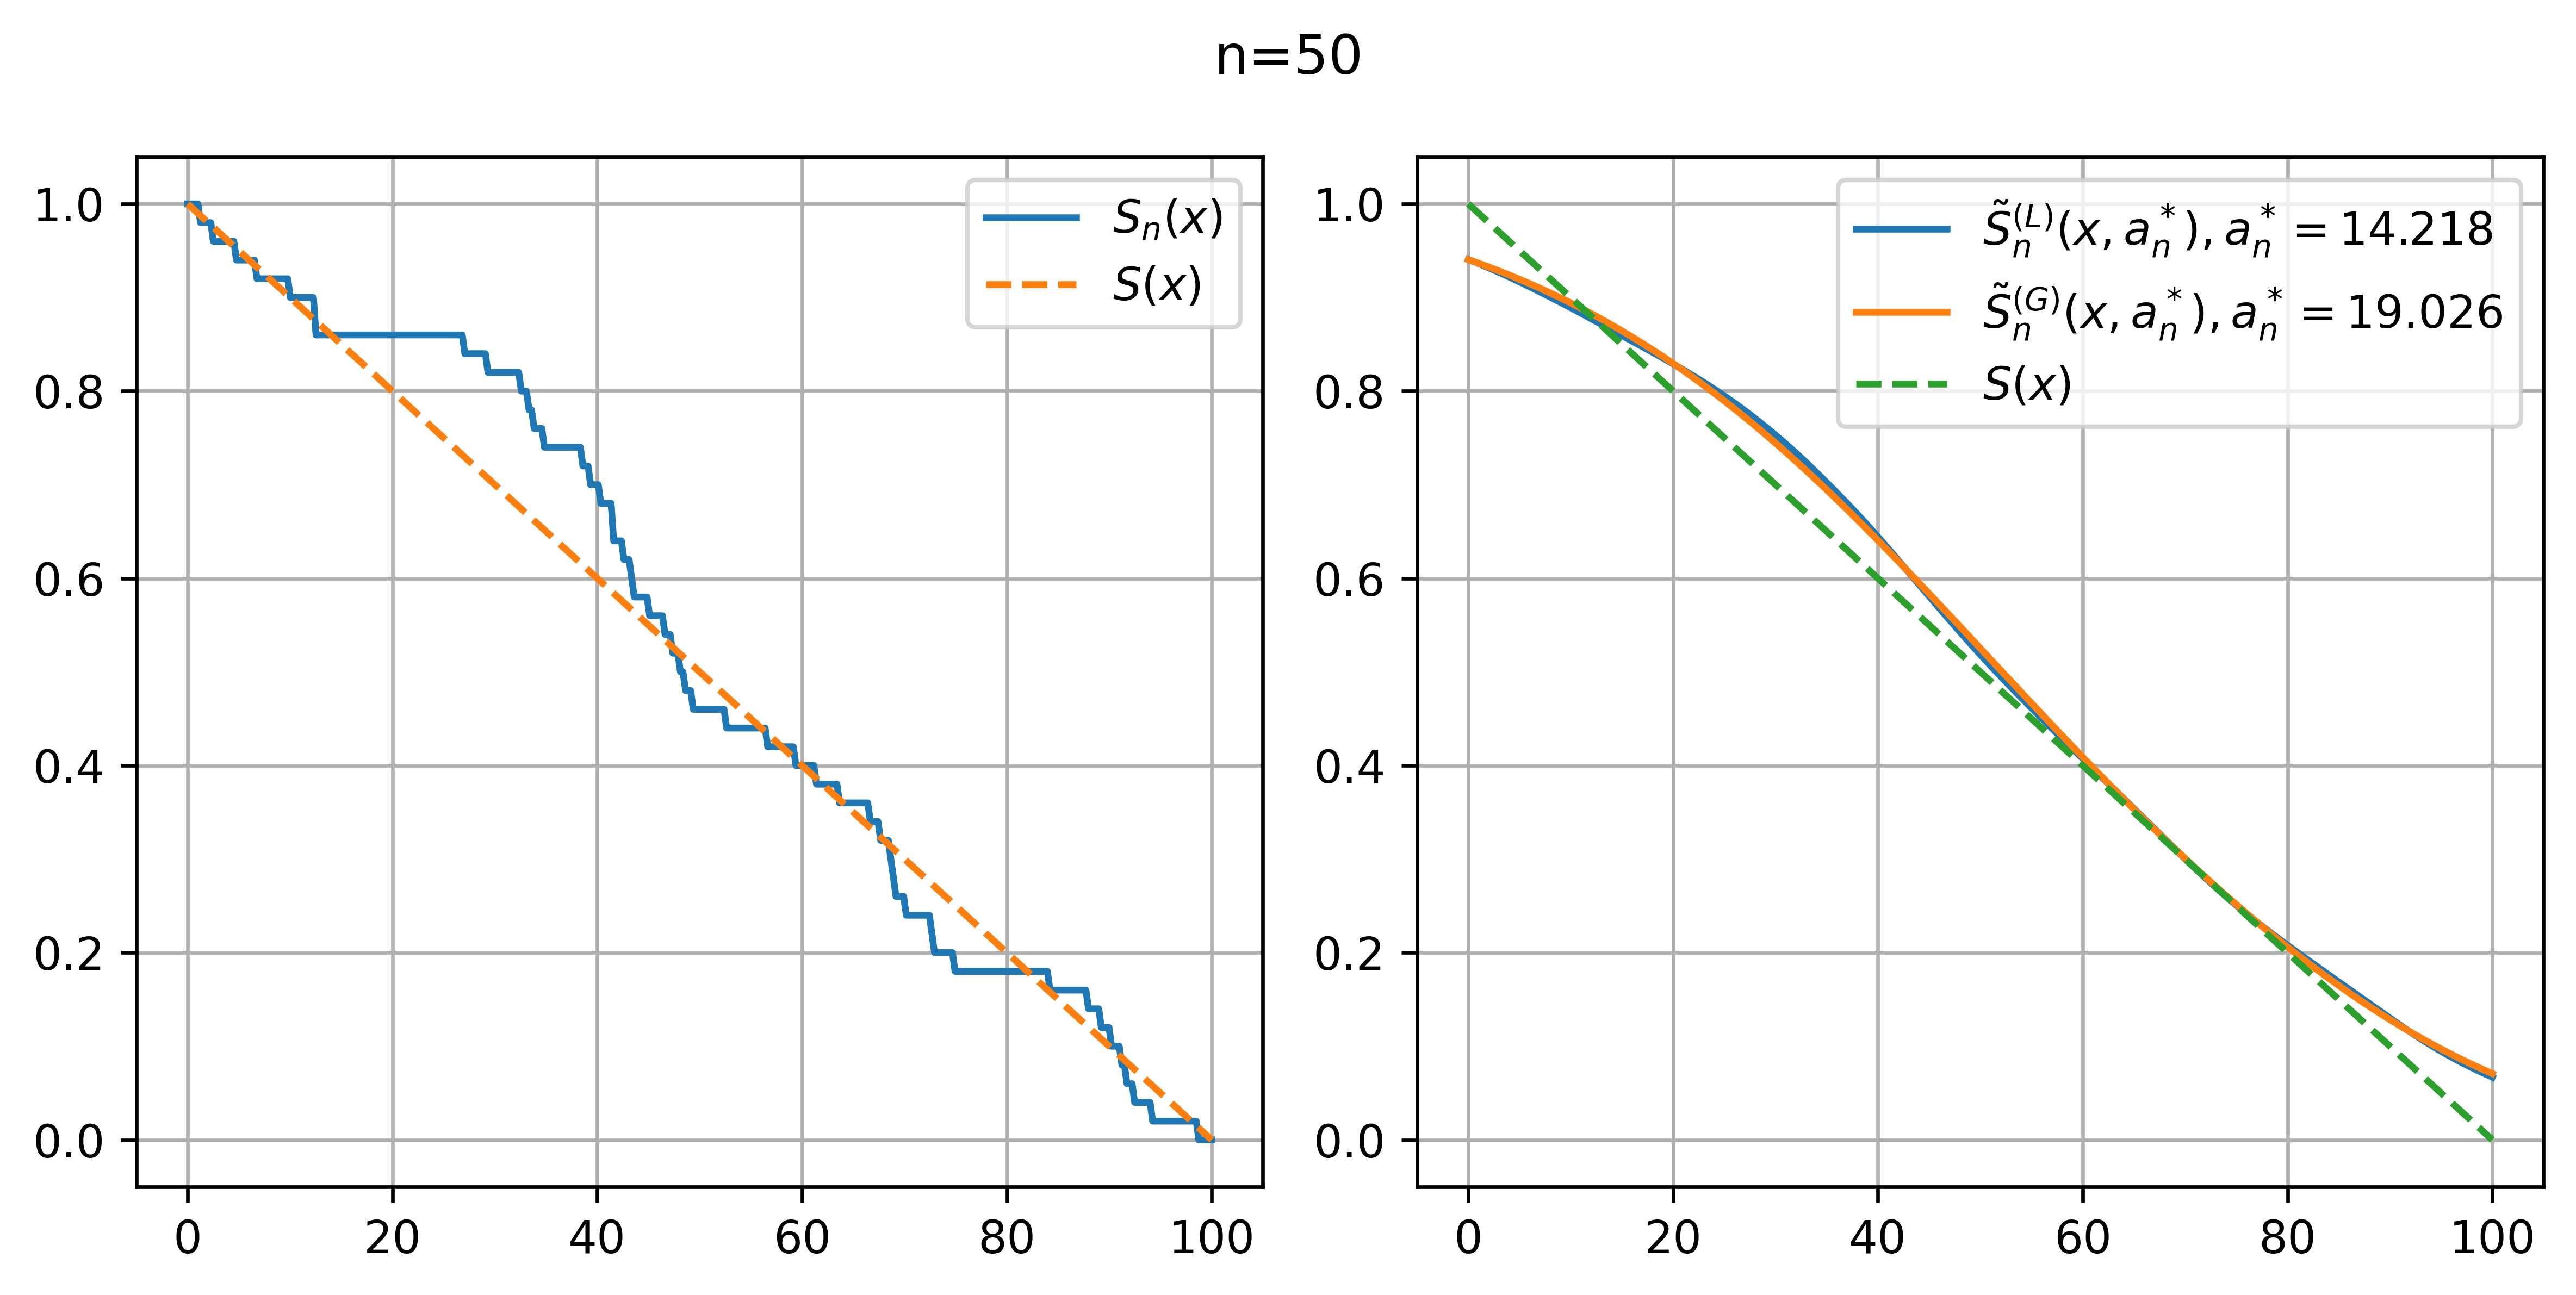

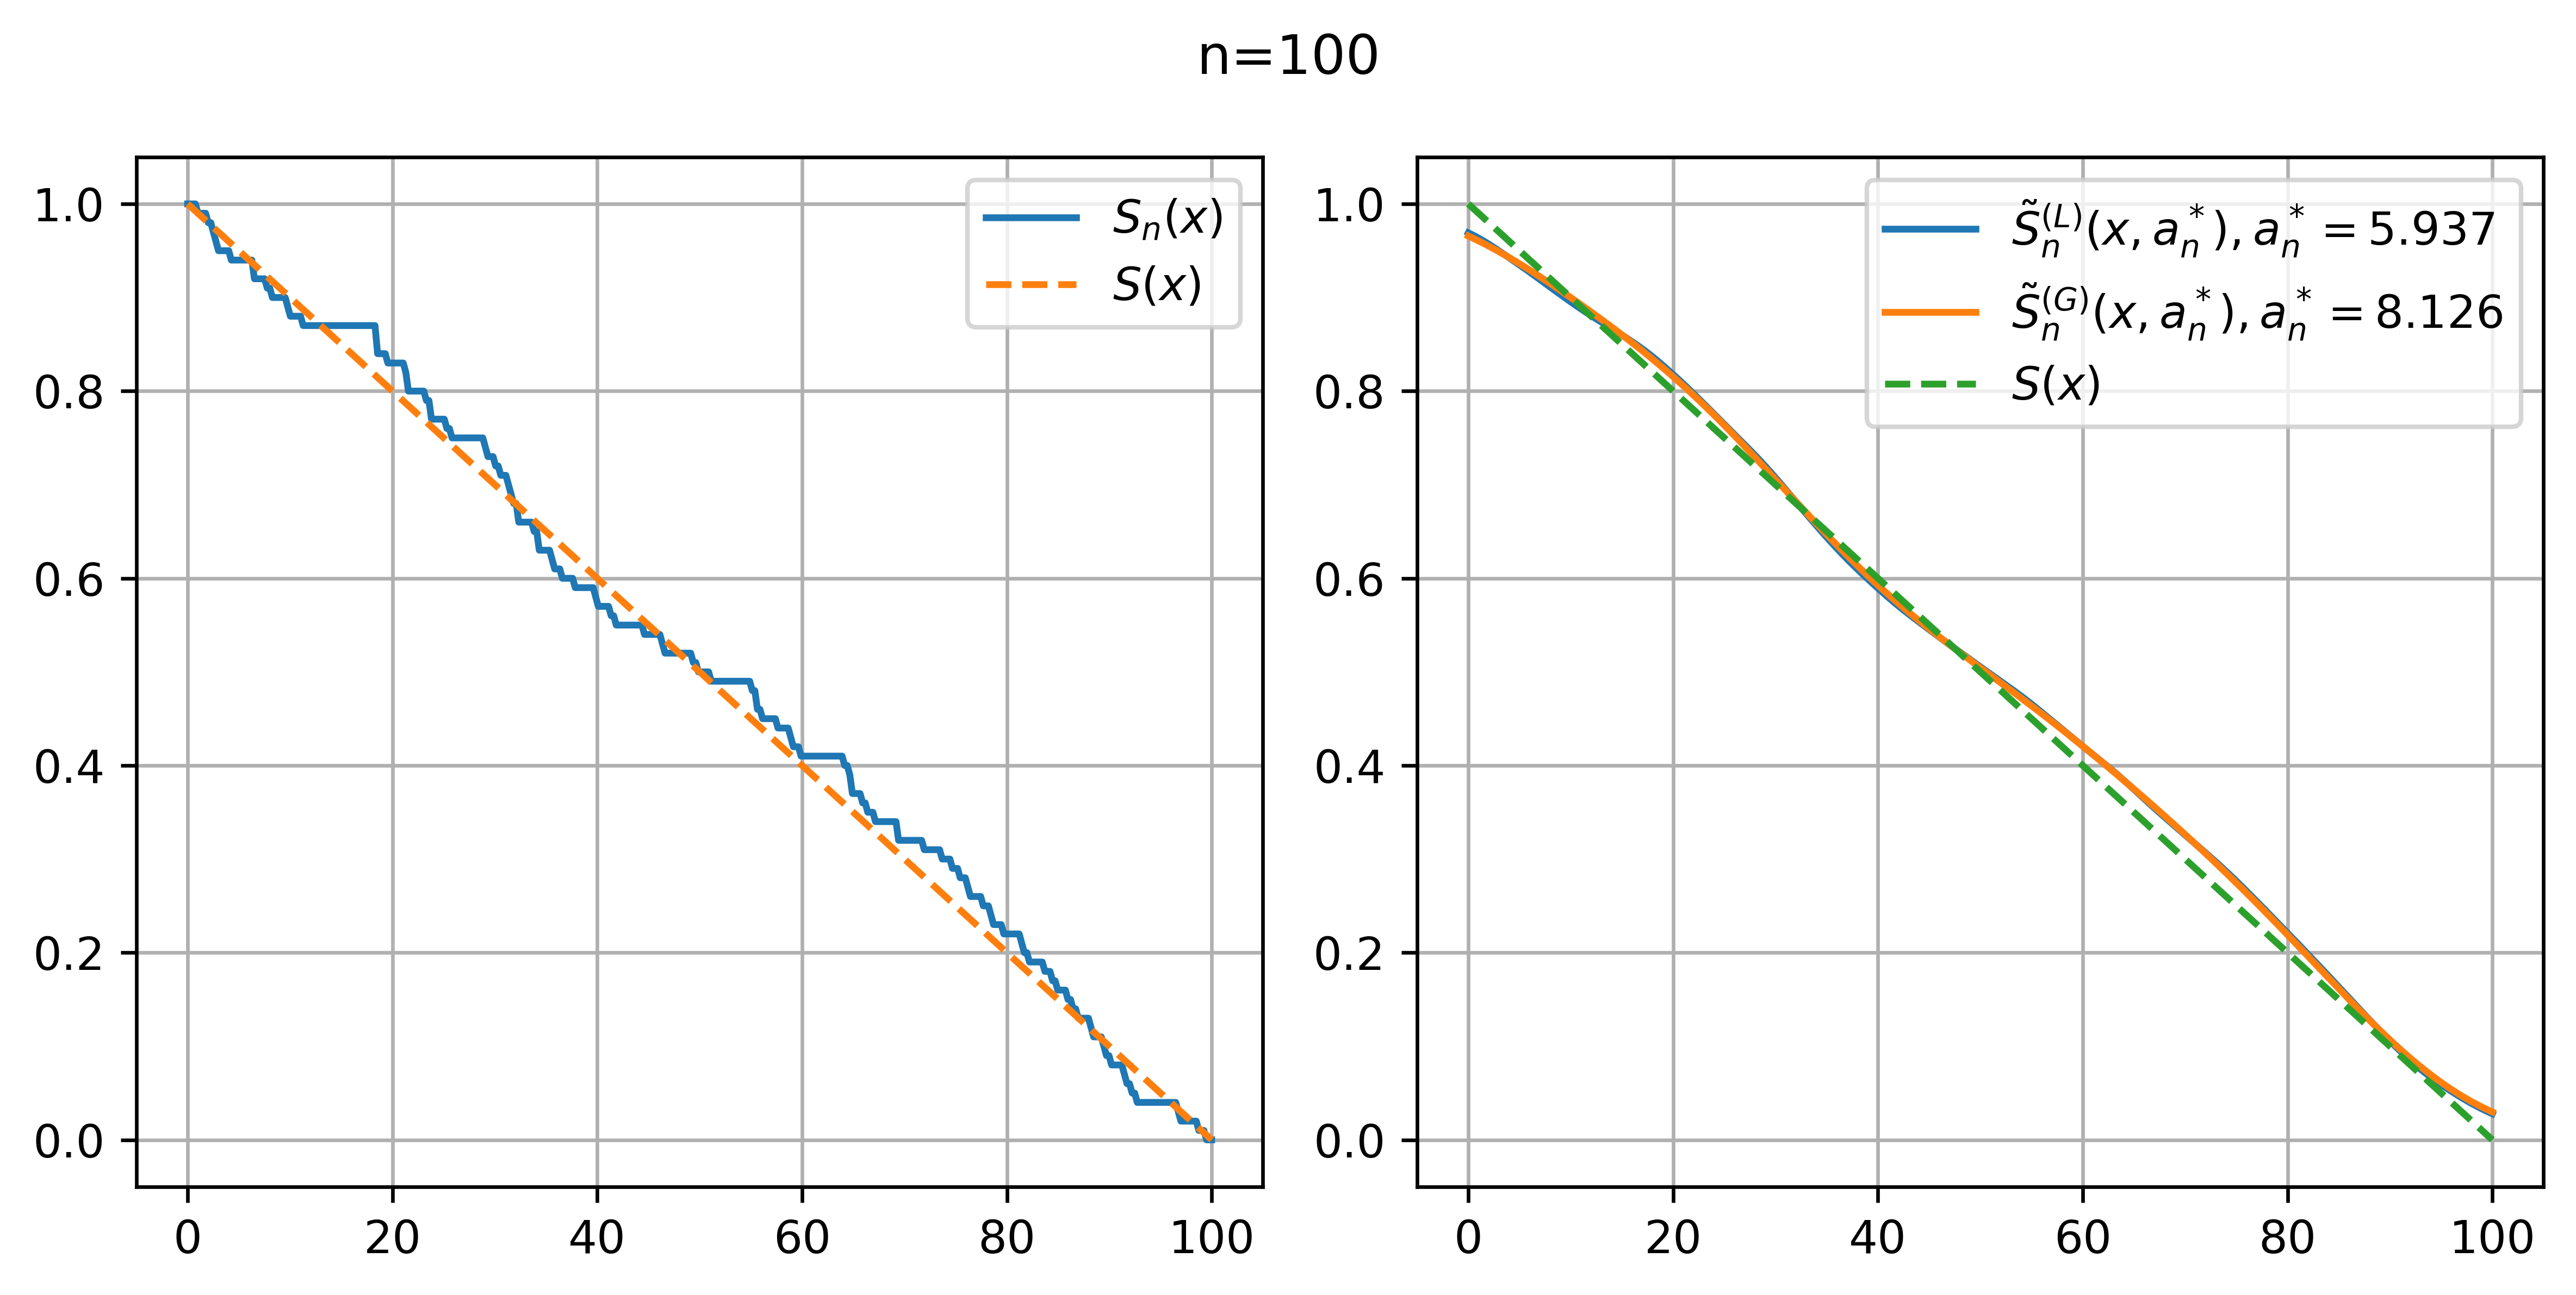

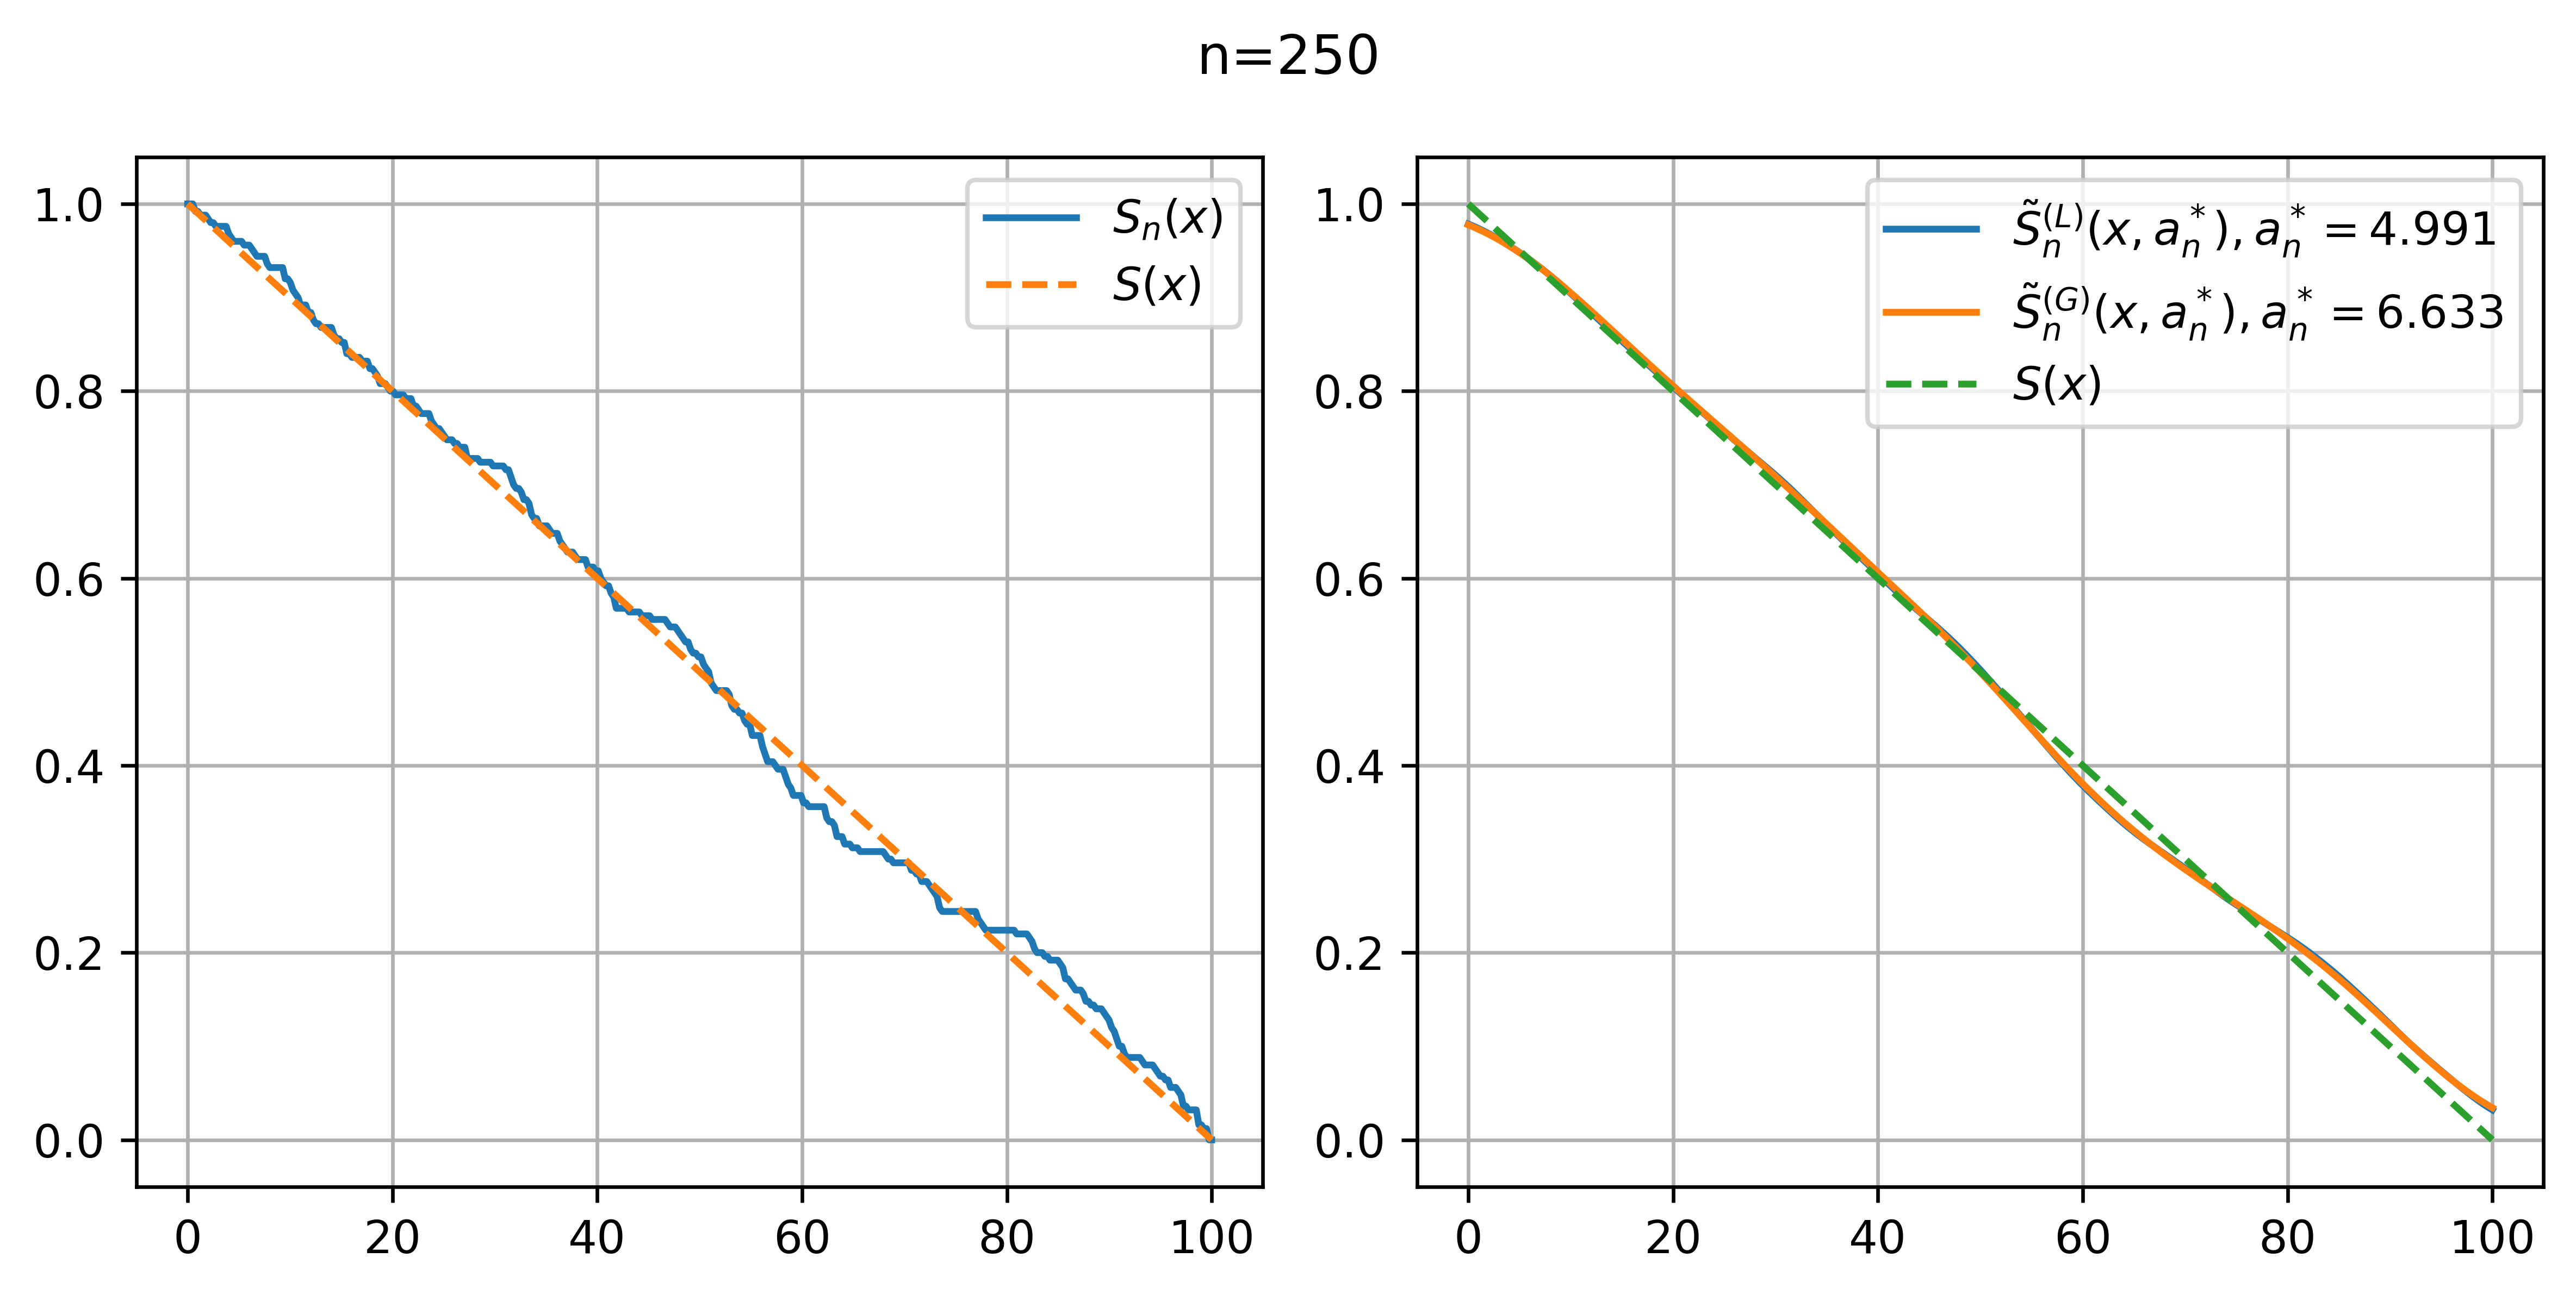

In [13]:
res = {}
for n in [10, 50, 100, 250, ]:
    age = data['продолжительность жизни'].sample(n).to_numpy()
    
    criteria = plots(n)

    res[n] = criteria

pd.DataFrame(res)